Importing Necessary Libraries

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle


Load the CSV file for the star dataset.

In [3]:
df = pd.read_csv('D:/College/GDSC/Stars.csv')

Correlation of the columns shown in a heatmap and Pairplot

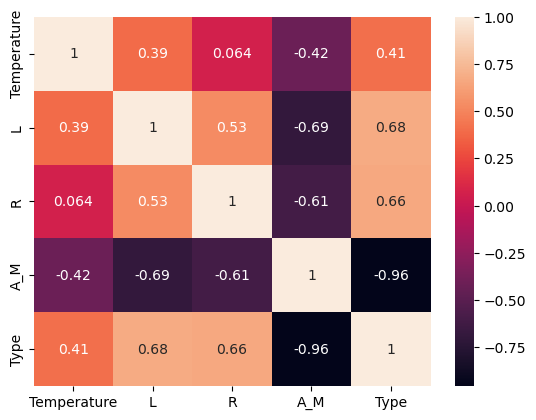

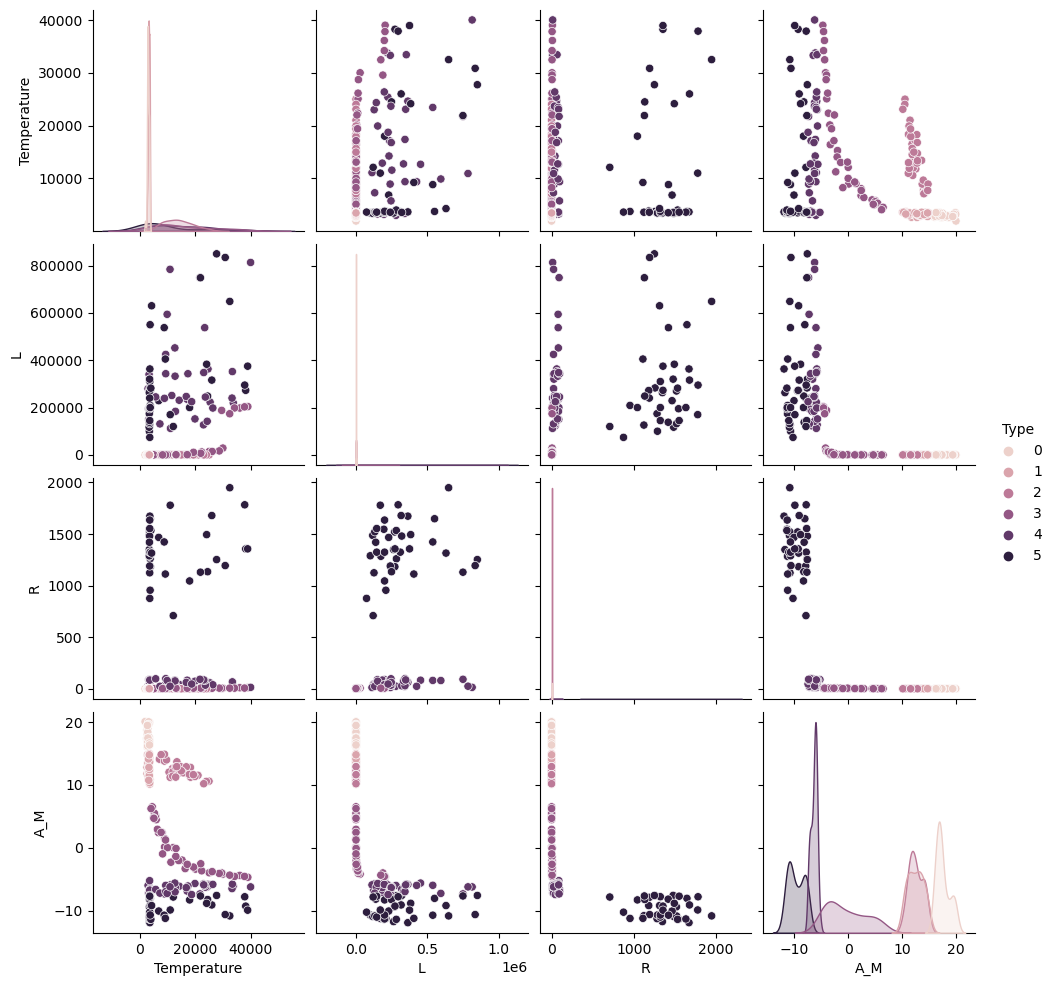

In [4]:
sns.heatmap(df.corr(),annot=True);
sns.pairplot(data=df, hue='Type')

Creating a One hot encoder and encoding color and Spectral class

In [5]:
Categ_col=['Color','Spectral_Class']
encoder = OneHotEncoder()
encoder.fit(df[Categ_col])
#Transforming the data
encoder_out = encoder.transform(df[Categ_col])
Trans_df = pd.DataFrame(encoder_out.toarray(),columns=encoder.get_feature_names())
#Concating with og
df = pd.concat([df, Trans_df], axis=1)
df = df.drop(Categ_col, axis=1)

d:\Ananconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Splitting data


In [45]:
x = df.drop('Type', axis=1)
y = df['Type']
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.84,random_state=42)

Train the model using Random Forest

In [46]:
model= RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(train_x,train_y)

RandomForestClassifier(random_state=42)

Predict the outcome

In [47]:
prediction = model.predict(test_x)

Evaluate accuracy score

In [48]:
acc = accuracy_score(test_y, prediction)
print("Accuracy is ",acc)

Accuracy is  0.9702970297029703


Save the model

In [51]:
filename = "Star_type.pickle"
pickle.dump(model, open(filename, "wb"))